In [11]:
#import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
#create a set of random latitude and longitude combinations
lats = np.random.uniform(low = -90, high = 90, size = 1500)
lngs = np.random.uniform(low = -180, high = 180, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [13]:
coordinates = list(lat_lngs)

In [14]:
from citipy import citipy

In [15]:
# create a list for holding the cities
cities = []
#identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name

    #if city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# print the city count to confirm suficiient count
len(cities)

640

In [16]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=871fd5a894c8e293d2e3ef714b59dbe1


In [18]:
#import the datatime module from the datetime library
from datetime import datetime

In [19]:
#create an empty list to hold the weather data
city_data = []
#print the beginning of the logging
print("Beginning Data Retrieval   ")
print("---------------------------")

#create counters
record_count = 1
set_count = 1

# loop thru all the cities in our list
for i, city in enumerate(cities):

    #group cities in sets of 50 for logging purposes
    if (i% 50 == 0 and i>=50):
        set_count+=1
        record_count = 1
    #create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

    #log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #add 1 to the record count
    record_count+=1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({
            
            "City": city.title(),
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date })

#if an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    #indicate that Data Loading is complete.
    print("------------------------  ")
    print("Data Retrieval Complete   ")
    print("------------------------  ")


g Record 32 of Set 10 | karratha
------------------------  
Data Retrieval Complete   
------------------------  
Processing Record 33 of Set 10 | punto fijo
------------------------  
Data Retrieval Complete   
------------------------  
Processing Record 34 of Set 10 | chara
------------------------  
Data Retrieval Complete   
------------------------  
Processing Record 35 of Set 10 | mayo
------------------------  
Data Retrieval Complete   
------------------------  
Processing Record 36 of Set 10 | hays
------------------------  
Data Retrieval Complete   
------------------------  
Processing Record 37 of Set 10 | collie
------------------------  
Data Retrieval Complete   
------------------------  
Processing Record 38 of Set 10 | khartoum
------------------------  
Data Retrieval Complete   
------------------------  
Processing Record 39 of Set 10 | cerritos
------------------------  
Data Retrieval Complete   
------------------------  
Processing Record 40 of Set 10 | san

In [20]:
len(city_data)

583

In [21]:
# convert the array of dictionaries to a pandas df
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiksi,71.6872,128.8694,-1.03,93,100,14.79,RU,2021-02-02 21:57:41
1,Ushuaia,-54.8000,-68.3000,55.40,76,75,6.91,AR,2021-02-02 21:56:19
2,Caravelas,-17.7125,-39.2481,77.86,80,99,7.34,BR,2021-02-02 21:57:50
3,Kodiak,57.7900,-152.4072,30.20,93,90,15.95,US,2021-02-02 21:57:50
4,Port Elizabeth,-33.9180,25.5701,68.00,88,40,3.44,ZA,2021-02-02 21:57:50
5,Lompoc,34.6391,-120.4579,61.00,82,1,16.11,US,2021-02-02 21:57:50
6,Mataura,-46.1927,168.8643,64.17,71,99,3.87,NZ,2021-02-02 21:57:51
7,Khatanga,71.9667,102.5000,-27.04,85,48,7.76,RU,2021-02-02 21:57:51
8,Mahebourg,-20.4081,57.7000,80.60,74,75,11.50,MU,2021-02-02 21:54:37
9,Sai Buri,6.7013,101.6168,74.66,84,67,7.81,TH,2021-02-02 21:57:51


In [22]:
#create the output file csv
output_data_file  = "weather_data/cities.csv"
#export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

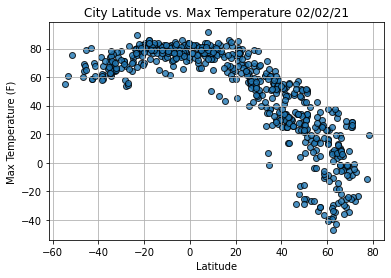

In [24]:
#import time module
import time

#build the scatter plot for latitude vs. max temperature.
plt.scatter(
    lats,
    max_temps,
    edgecolors="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label = "Cities")
    
plt.grid(True)
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

#save the figure
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

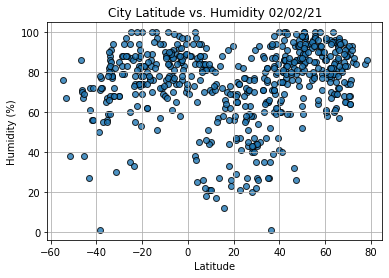

In [25]:
#build the scatter plot for latitude vs. humidity
plt.scatter(
    lats,
    humidity,
    edgecolors="k",
    linewidths=1,
    marker = "o",
    alpha = 0.8,
    label = "Cities")

#incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

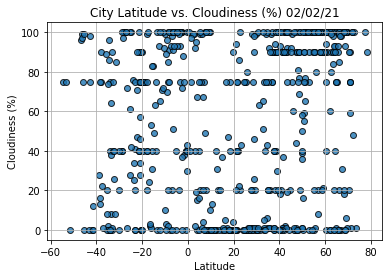

In [26]:
#build the scatter plot for latitude vs. cloudiness
plt.scatter(
    lats,
    cloudiness,
    edgecolors="k",
    linewidths=1,
    marker = "o",
    alpha = 0.8,
    label = "Cities")

#incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

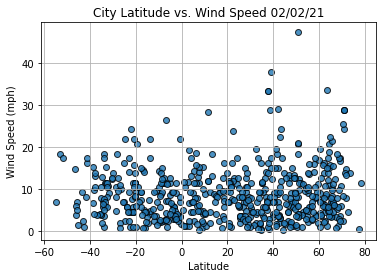

In [27]:
#build the scatter plot for latitude vs. wind speed
plt.scatter(
    lats,
    wind_speed,
    edgecolors="k",
    linewidths=1,
    marker = "o",
    alpha = 0.8,
    label = "Cities")

#incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [69]:
#import linregress
from scipy.stats import linregress

#create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    #run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    #calculate the regression line y values from the slope and intercept
    regress_values = slope*(x_values) + intercept
    #get the equation of the line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
    #create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color = "r")
    #annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title, ha = "center")
    plt.show()

In [46]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiksi,71.6872,128.8694,-1.03,93,100,14.79,RU,2021-02-02 21:57:41
1,Ushuaia,-54.8000,-68.3000,55.40,76,75,6.91,AR,2021-02-02 21:56:19
2,Caravelas,-17.7125,-39.2481,77.86,80,99,7.34,BR,2021-02-02 21:57:50
3,Kodiak,57.7900,-152.4072,30.20,93,90,15.95,US,2021-02-02 21:57:50
4,Port Elizabeth,-33.9180,25.5701,68.00,88,40,3.44,ZA,2021-02-02 21:57:50


In [47]:
index13 = city_data_df.loc[13]
print(index13)

City                       Mackay
Lat                        -21.15
Lng                         149.2
Max Temp                    80.01
Humidity                       88
Cloudiness                     57
Wind Speed                   5.75
Country                        AU
Date          2021-02-02 21:57:51
Name: 13, dtype: object


In [48]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiksi,71.6872,128.8694,-1.03,93,100,14.79,RU,2021-02-02 21:57:41
3,Kodiak,57.7900,-152.4072,30.20,93,90,15.95,US,2021-02-02 21:57:50
5,Lompoc,34.6391,-120.4579,61.00,82,1,16.11,US,2021-02-02 21:57:50
7,Khatanga,71.9667,102.5000,-27.04,85,48,7.76,RU,2021-02-02 21:57:51
9,Sai Buri,6.7013,101.6168,74.66,84,67,7.81,TH,2021-02-02 21:57:51


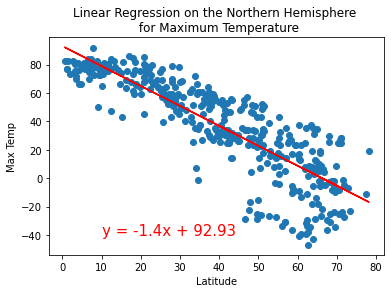

LinregressResult(slope=-1.4032822993609666, intercept=92.92891557387036, rvalue=-0.8470067629103766, pvalue=1.2597404471706838e-109, stderr=0.04448212184288423)

In [82]:
#linear regression on the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#call the function
plot_linear_regression(
    x_values, 
    y_values, 
    "Linear Regression on the Northern Hemisphere \n for Maximum Temperature",
    "Max Temp", (10,-40))

linregress(x_values, y_values)

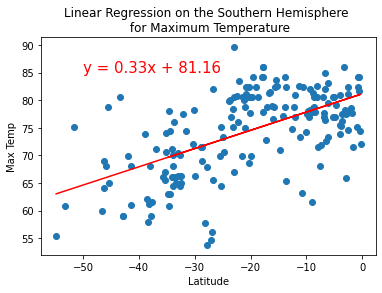

LinregressResult(slope=0.3310497450326007, intercept=81.16477980718616, rvalue=0.5742434396843065, pvalue=5.683267728071653e-18, stderr=0.0345138202089037)

In [81]:
# linear regression on the southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,85))

linregress(x_values, y_values)

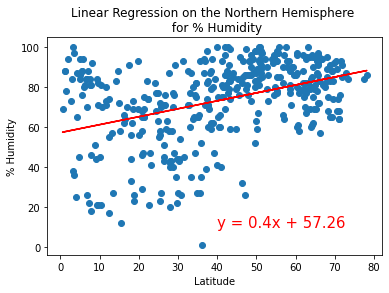

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

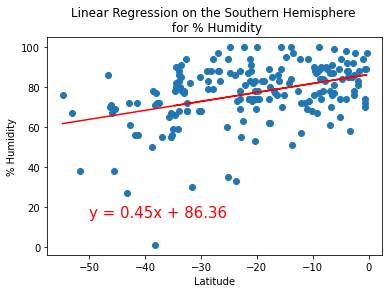

LinregressResult(slope=0.4490471483265402, intercept=86.36331173133524, rvalue=0.39975392753401645, pvalue=1.207607372093536e-08, stderr=0.0752954808386064)

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))
linregress(x_values, y_values)

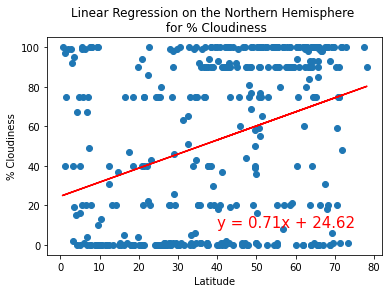

In [91]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,9))

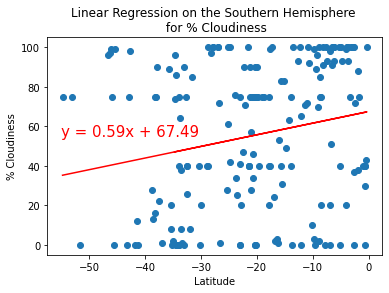

LinregressResult(slope=0.5882124191534267, intercept=67.48904628665336, rvalue=0.2096681112692586, pvalue=0.003784426819391564, stderr=0.20059443120511153)

In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,55))
linregress(x_values, y_values)

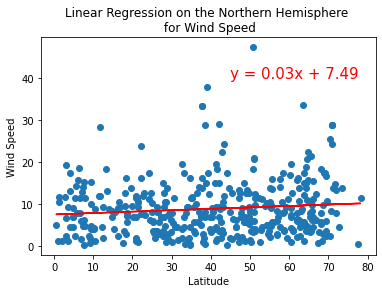

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(45,40))

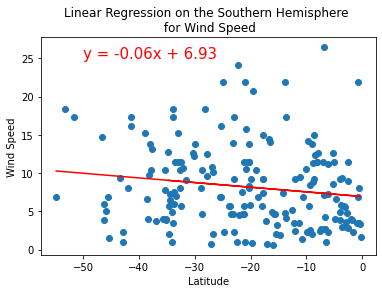

In [96]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))